In [170]:
suppressMessages(library(MatrixEQTL))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))

## Convert RNA-seq Data to Matrix eQTL Format

In [2]:
# read in RNA-seq gene expression data
rnaseq.data <- read.table('GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', header = TRUE)
head(rnaseq.data)

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,⋯,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.1018578,0.07810952,0.04898067,0.1185971,0.004034964,0.01092535,⋯,0.08860114,0.2400097,0.1371749,0.1484942,0.03864295,0.08850872,0.02920397,0.02442312,0.04481619,0.1391860
2,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.1838049,5.68691051,2.43465333,3.8308942,6.612288353,4.70964559,⋯,13.42820452,6.0945002,12.5360002,2.2172619,3.57339369,7.58336362,4.05288250,1.57037789,4.90037158,6.7373077
3,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.1999103,1.57357170,0.52161578,1.4472254,3.565790724,1.98268073,⋯,3.22587998,1.9960668,2.8549226,2.2673432,1.33120131,2.18789498,1.00425018,3.00331645,1.98436164,1.6849538
4,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.8319398,0.06977775,0.93108575,0.6209408,1.660668362,0.57048106,⋯,1.02338107,1.1278517,0.7744094,1.4958539,0.89534153,1.51352088,0.82637716,1.02120073,0.95250245,0.7405648
5,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.6464224,24.39557150,16.44537352,24.8066495,25.113348878,19.23398826,⋯,25.07949024,28.7255280,24.4505198,27.2640689,26.91281426,29.50920968,26.46233107,25.62400948,25.70774121,22.8249571
6,ENSG00000136237.12,ENSG00000136237.12,7,22396763,3.7885027,2.05096277,4.00031300,3.2716192,1.798215918,1.51668841,⋯,2.90939301,1.9211762,5.0838728,2.8665734,1.29778761,2.88831618,2.14502227,3.55759776,4.15206264,1.2168338


In [3]:
# adjust RNA-seq data to fit Matrix eQTL format
rownames(rnaseq.data) <- rnaseq.data$Gene_Symbol
rnaseq.data <- rnaseq.data[, 5:ncol(rnaseq.data)]
head(rnaseq.data)

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,⋯,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000152931.6,0.1018578,0.07810952,0.04898067,0.1185971,0.004034964,0.01092535,-0.0009011976,-0.006706461,0.09886302,0.04528466,⋯,0.08860114,0.2400097,0.1371749,0.1484942,0.03864295,0.08850872,0.02920397,0.02442312,0.04481619,0.1391860
ENSG00000183696.9,8.1838049,5.68691051,2.43465333,3.8308942,6.612288353,4.70964559,7.3488756318,8.180939836,8.72188896,8.16947654,⋯,13.42820452,6.0945002,12.5360002,2.2172619,3.57339369,7.58336362,4.05288250,1.57037789,4.90037158,6.7373077
ENSG00000139269.2,1.1999103,1.57357170,0.52161578,1.4472254,3.565790724,1.98268073,0.6753051856,3.817394989,2.56137582,1.23104912,⋯,3.22587998,1.9960668,2.8549226,2.2673432,1.33120131,2.18789498,1.00425018,3.00331645,1.98436164,1.6849538
ENSG00000169129.8,0.8319398,0.06977775,0.93108575,0.6209408,1.660668362,0.57048106,1.2593929620,0.734784011,1.47912444,1.54865303,⋯,1.02338107,1.1278517,0.7744094,1.4958539,0.89534153,1.51352088,0.82637716,1.02120073,0.95250245,0.7405648
ENSG00000134602.11,27.6464224,24.39557150,16.44537352,24.8066495,25.113348878,19.23398826,27.8811161132,27.194117445,28.57985654,27.22641570,⋯,25.07949024,28.7255280,24.4505198,27.2640689,26.91281426,29.50920968,26.46233107,25.62400948,25.70774121,22.8249571
ENSG00000136237.12,3.7885027,2.05096277,4.00031300,3.2716192,1.798215918,1.51668841,2.5003327687,4.509276810,2.34462511,2.35809328,⋯,2.90939301,1.9211762,5.0838728,2.8665734,1.29778761,2.88831618,2.14502227,3.55759776,4.15206264,1.2168338


In [4]:
# read in plink output
snp.data <- read.table('./plink.raw', header = TRUE)
head(snp.data)

,FID,IID,PAT,MAT,SEX,PHENOTYPE,rs149201999_C,rs146752890_G,rs139377059_T,rs6518357_A,⋯,rs6010091_A,rs138384468_G,rs145146472_A,rs9616985_C,rs144549712_A,rs62240042_T,rs200507571_AT,rs3896457_C,rs149733995_C,rs181833046_T
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,HG00096,HG00096,0,0,0,-9,0,1,0,0,⋯,1,0,1,0,0,0,0,0,0,1
2,HG00097,HG00097,0,0,0,-9,1,1,1,1,⋯,1,0,1,0,0,1,0,1,0,0
3,HG00099,HG00099,0,0,0,-9,1,1,1,1,⋯,1,1,0,1,0,1,0,0,2,0
4,HG00100,HG00100,0,0,0,-9,0,0,0,0,⋯,0,0,0,0,0,0,2,0,0,0
5,HG00101,HG00101,0,0,0,-9,1,1,1,1,⋯,1,1,0,1,0,1,0,0,1,0
6,HG00102,HG00102,0,0,0,-9,1,0,1,1,⋯,0,0,0,0,0,0,1,0,1,0


In [5]:
rownames(snp.data) <- snp.data$IID
snp.data <- snp.data[, 7:ncol(snp.data)]
snp.data <- t(snp.data)
head(snp.data)

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00106,HG00108,⋯,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20818,NA20819,NA20826,NA20828
rs149201999_C,0,1,1,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs146752890_G,1,1,1,0,1,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs139377059_T,0,1,1,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs6518357_A,0,1,1,0,1,1,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs62224609_C,0,1,1,0,0,1,0,0,1,0,⋯,0,0,0,0,0,1,1,1,0,0
rs62224610_C,0,1,1,1,1,1,0,0,1,2,⋯,1,0,1,0,0,1,1,1,1,1


In [20]:
rownames(snp.data) <- lapply(rownames(snp.data), function(x) {strsplit(x, '_')[[1]][1]})
head(snp.data)

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00106,HG00108,⋯,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
rs149201999,0,1,1,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs146752890,1,1,1,0,1,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs139377059,0,1,1,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs6518357,0,1,1,0,1,1,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs62224609,0,1,1,0,0,1,0,0,1,0,⋯,0,0,0,0,0,0,1,1,0,0
rs62224610,0,1,1,1,1,1,0,0,1,2,⋯,0,1,0,1,0,0,1,1,1,1


In [7]:
rnaseq.samples <- colnames(rnaseq.data)
snp.data <- snp.data[, colnames(snp.data) %in% rnaseq.samples]

snp.samples <- colnames(snp.data)
rnaseq.data <- rnaseq.data[, colnames(rnaseq.data) %in% snp.samples]

In [21]:
# save output to file
write.table(rnaseq.data, './matrix_eqtl_phenotype.txt')
write.table(snp.data, './matrix_eqtl_genotype_data.txt')

In [12]:
genes <- read.table('GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', header = TRUE)
head(genes)

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,⋯,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.1018578,0.07810952,0.04898067,0.1185971,0.004034964,0.01092535,⋯,0.08860114,0.2400097,0.1371749,0.1484942,0.03864295,0.08850872,0.02920397,0.02442312,0.04481619,0.1391860
2,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.1838049,5.68691051,2.43465333,3.8308942,6.612288353,4.70964559,⋯,13.42820452,6.0945002,12.5360002,2.2172619,3.57339369,7.58336362,4.05288250,1.57037789,4.90037158,6.7373077
3,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.1999103,1.57357170,0.52161578,1.4472254,3.565790724,1.98268073,⋯,3.22587998,1.9960668,2.8549226,2.2673432,1.33120131,2.18789498,1.00425018,3.00331645,1.98436164,1.6849538
4,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.8319398,0.06977775,0.93108575,0.6209408,1.660668362,0.57048106,⋯,1.02338107,1.1278517,0.7744094,1.4958539,0.89534153,1.51352088,0.82637716,1.02120073,0.95250245,0.7405648
5,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.6464224,24.39557150,16.44537352,24.8066495,25.113348878,19.23398826,⋯,25.07949024,28.7255280,24.4505198,27.2640689,26.91281426,29.50920968,26.46233107,25.62400948,25.70774121,22.8249571
6,ENSG00000136237.12,ENSG00000136237.12,7,22396763,3.7885027,2.05096277,4.00031300,3.2716192,1.798215918,1.51668841,⋯,2.90939301,1.9211762,5.0838728,2.8665734,1.29778761,2.88831618,2.14502227,3.55759776,4.15206264,1.2168338


In [13]:
genes <- genes[, c('Gene_Symbol', 'Chr', 'Coord')]
head(genes)

,Gene_Symbol,Chr,Coord
,<chr>,<chr>,<int>
1,ENSG00000152931.6,5,59783540
2,ENSG00000183696.9,7,48128225
3,ENSG00000139269.2,12,57846106
4,ENSG00000169129.8,10,116164515
5,ENSG00000134602.11,X,131157293
6,ENSG00000136237.12,7,22396763


In [14]:
colnames(genes) <- c('geneid', 'chr', 'left')
genes$right <- genes$left + 1
head(genes)

,geneid,chr,left,right
,<chr>,<chr>,<int>,<dbl>
1,ENSG00000152931.6,5,59783540,59783541
2,ENSG00000183696.9,7,48128225,48128226
3,ENSG00000139269.2,12,57846106,57846107
4,ENSG00000169129.8,10,116164515,116164516
5,ENSG00000134602.11,X,131157293,131157294
6,ENSG00000136237.12,7,22396763,22396764


In [17]:
snp.df <- read.table('./plink.bim', header = FALSE)
snp.df <- snp.df[, c('V1', 'V2', 'V4')]
snp.df <- snp.df[, c('V2', 'V1', 'V4')]
colnames(snp.df) <- c('snpid', 'chr', 'pos')
head(snp.df)

,snpid,chr,pos
,<chr>,<int>,<int>
1,rs149201999,22,16050408
2,rs146752890,22,16050612
3,rs139377059,22,16050678
4,rs6518357,22,16051107
5,rs62224609,22,16051249
6,rs62224610,22,16051347


In [18]:
rownames(snp.data)

In [22]:
snp.df <- snp.df[snp.df$snpid %in% rownames(snp.data), ]
head(snp.df)

,snpid,chr,pos
,<chr>,<int>,<int>
1,rs149201999,22,16050408
2,rs146752890,22,16050612
3,rs139377059,22,16050678
4,rs6518357,22,16051107
5,rs62224609,22,16051249
6,rs62224610,22,16051347


In [23]:
nrow(snp.df)

[1] 101227

In [27]:
ncol(snp.data)

[1] 421

## Run Matrix eQTL Pipeline

In [42]:
useModel = modelLINEAR
SNP_file_name = './matrix_eqtl_genotype_data.txt'
expression_file_name = './matrix_eqtl_phenotype.txt'
covariates_file_name = character()
output_file_name = tempfile()

pvOutputThreshold = 1e-2
errorCovariance = numeric()

snps = SlicedData$new()
snps$fileDelimiter = " "
snps$fileOmitCharacters = "NA"
snps$fileSkipRows = 1
snps$fileSkipColumns = 1
snps$fileSliceSize = 2000
snps$LoadFile(SNP_file_name)

gene = SlicedData$new()
gene$fileDelimiter = " "
gene$fileOmitCharacters = "NA"
gene$fileSkipRows = 1
gene$fileSkipColumns = 1
gene$fileSliceSize = 2000
gene$LoadFile(expression_file_name)

me = Matrix_eQTL_main(
    snps = snps,
    gene = gene,
    genepos = genes,
    snpspos = snp.df,
    cisDist = 500000,
    pvOutputThreshold.cis = 5e-8,
    pvOutputThreshold = 0,
#     cvrt = cvrt,
    output_file_name = output_file_name,
    useModel = useModel,
    errorCovariance = errorCovariance,
    verbose = TRUE,
    pvalue.hist = 'qqplot',
    min.pv.by.genesnp = FALSE,
    noFDRsaveMemory = FALSE
)

Rows read: 2,000

Rows read: 4,000

Rows read: 6,000

Rows read: 8,000

Rows read: 10,000

Rows read: 12,000

Rows read: 14,000

Rows read: 16,000

Rows read: 18,000

Rows read: 20,000

Rows read: 22,000

Rows read: 24,000

Rows read: 26,000

Rows read: 28,000

Rows read: 30,000

Rows read: 32,000

Rows read: 34,000

Rows read: 36,000

Rows read: 38,000

Rows read: 40,000

Rows read: 42,000

Rows read: 44,000

Rows read: 46,000

Rows read: 48,000

Rows read: 50,000

Rows read: 52,000

Rows read: 54,000

Rows read: 56,000

Rows read: 58,000

Rows read: 60,000

Rows read: 62,000

Rows read: 64,000

Rows read: 66,000

Rows read: 68,000

Rows read: 70,000

Rows read: 72,000

Rows read: 74,000

Rows read: 76,000

Rows read: 78,000

Rows read: 80,000

Rows read: 82,000

Rows read: 84,000

Rows read: 86,000

Rows read: 88,000

Rows read: 90,000

Rows read: 92,000

Rows read: 94,000

Rows read: 96,000

Rows read: 98,000

Rows read: 100,000

Rows read: 101227 done.

Rows read: 2,000

Rows read:

In [25]:
me

snps,gene,statistic,pvalue,FDR,beta
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
esv2669470,ENSG00000184674.7,-36.17242,5.865226e-131,1.009412e-124,-8.16339
rs2142552,ENSG00000100376.7,29.15050,7.473595e-103,4.287382e-97,13.41418
rs7285172,ENSG00000100376.7,29.15050,7.473595e-103,4.287382e-97,13.41418
rs136592,ENSG00000100376.7,29.08891,1.353426e-102,5.823154e-97,13.24144
rs104664,ENSG00000100376.7,28.63237,1.119015e-100,3.851675e-95,13.29228
rs6007595,ENSG00000100376.7,28.54348,2.650756e-100,7.603306e-95,13.11885
rs3827393,ENSG00000100376.7,28.03111,3.883879e-98,7.426892e-93,13.07598
rs2350630,ENSG00000100376.7,28.03111,3.883879e-98,7.426892e-93,13.07598
rs136601,ENSG00000100376.7,28.03111,3.883879e-98,7.426892e-93,13.07598


In [70]:
eqtls <- me$cis$eqtls
gene.eqtls <- eqtls[eqtls$gene == 'ENSG00000100376.7', ]
head(gene.eqtls)

,snps,gene,statistic,pvalue,FDR,beta
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,rs2142552,ENSG00000100376.7,29.15050,7.473595e-103,4.287382e-97,13.41418
3,rs7285172,ENSG00000100376.7,29.15050,7.473595e-103,4.287382e-97,13.41418
4,rs136592,ENSG00000100376.7,29.08891,1.353426e-102,5.823154e-97,13.24144
5,rs104664,ENSG00000100376.7,28.63237,1.119015e-100,3.851675e-95,13.29228
6,rs6007595,ENSG00000100376.7,28.54348,2.650756e-100,7.603306e-95,13.11885
7,rs3827393,ENSG00000100376.7,28.03111,3.883879e-98,7.426892e-93,13.07598


In [71]:
gene.eqtls <- gene.eqtls[, c('snps', 'pvalue')]
gene.eqtls$chrom <- 22
head(gene.eqtls)

,snps,pvalue,chrom
,<chr>,<dbl>,<dbl>
2,rs2142552,7.473595e-103,22
3,rs7285172,7.473595e-103,22
4,rs136592,1.353426e-102,22
5,rs104664,1.119015e-100,22
6,rs6007595,2.650756e-100,22
7,rs3827393,3.883879e-98,22


In [74]:
gene.eqtls <- merge(gene.eqtls, snp.df, by.x = 'snps', by.y = 'snpid')
head(gene.eqtls)

,snps,pvalue,chrom,chr,pos
,<chr>,<dbl>,<dbl>,<int>,<int>
1,rs1003505,7.779683e-28,22,22,45844681
2,rs1022476,5.063754e-36,22,22,45821715
3,rs1022479,2.156330e-40,22,22,45822347
4,rs1044744,5.770386e-09,22,22,45737310
5,rs104664,1.119015e-100,22,22,45711854
6,rs10528596,1.129619e-56,22,22,45722753


In [75]:
gene.eqtls <- gene.eqtls[, c('chr', 'pos', 'pvalue')]
head(gene.eqtls)

,chr,pos,pvalue
,<int>,<int>,<dbl>
1,22,45844681,7.779683e-28
2,22,45821715,5.063754e-36
3,22,45822347,2.156330e-40
4,22,45737310,5.770386e-09
5,22,45711854,1.119015e-100
6,22,45722753,1.129619e-56


In [80]:
gene.eqtls <- gene.eqtls[order(gene.eqtls$pos), ]

In [81]:
write.table(gene.eqtls, 'locus_zoom.txt', sep='\t', quote = FALSE, row.names = FALSE, col.names = FALSE)

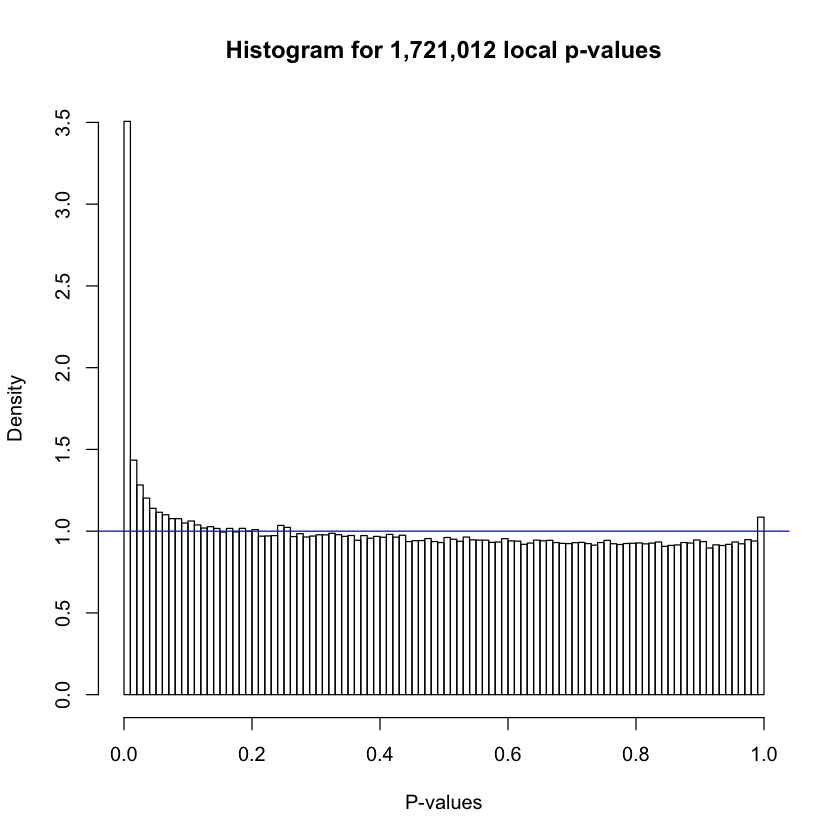

In [28]:
plot(me)

In [29]:
head(snp.data)

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00106,HG00108,⋯,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
rs149201999,0,1,1,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs146752890,1,1,1,0,1,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs139377059,0,1,1,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs6518357,0,1,1,0,1,1,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs62224609,0,1,1,0,0,1,0,0,1,0,⋯,0,0,0,0,0,0,1,1,0,0
rs62224610,0,1,1,1,1,1,0,0,1,2,⋯,0,1,0,1,0,0,1,1,1,1


In [30]:
head(rnaseq.data)

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00106,HG00108,⋯,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000152931.6,0.1018578,0.07810952,0.04898067,0.1185971,0.004034964,0.01092535,-0.0009011976,-0.006706461,0.04528466,0.07693674,⋯,0.08860114,0.2400097,0.1371749,0.1484942,0.03864295,0.08850872,0.02920397,0.02442312,0.04481619,0.1391860
ENSG00000183696.9,8.1838049,5.68691051,2.43465333,3.8308942,6.612288353,4.70964559,7.3488756318,8.180939836,8.16947654,4.09009915,⋯,13.42820452,6.0945002,12.5360002,2.2172619,3.57339369,7.58336362,4.05288250,1.57037789,4.90037158,6.7373077
ENSG00000139269.2,1.1999103,1.57357170,0.52161578,1.4472254,3.565790724,1.98268073,0.6753051856,3.817394989,1.23104912,1.26943983,⋯,3.22587998,1.9960668,2.8549226,2.2673432,1.33120131,2.18789498,1.00425018,3.00331645,1.98436164,1.6849538
ENSG00000169129.8,0.8319398,0.06977775,0.93108575,0.6209408,1.660668362,0.57048106,1.2593929620,0.734784011,1.54865303,1.01019818,⋯,1.02338107,1.1278517,0.7744094,1.4958539,0.89534153,1.51352088,0.82637716,1.02120073,0.95250245,0.7405648
ENSG00000134602.11,27.6464224,24.39557150,16.44537352,24.8066495,25.113348878,19.23398826,27.8811161132,27.194117445,27.22641570,25.38471441,⋯,25.07949024,28.7255280,24.4505198,27.2640689,26.91281426,29.50920968,26.46233107,25.62400948,25.70774121,22.8249571
ENSG00000136237.12,3.7885027,2.05096277,4.00031300,3.2716192,1.798215918,1.51668841,2.5003327687,4.509276810,2.35809328,2.72995781,⋯,2.90939301,1.9211762,5.0838728,2.8665734,1.29778761,2.88831618,2.14502227,3.55759776,4.15206264,1.2168338


In [32]:
head(snp.data['rs2142552', ])

HG00096 HG00097 HG00099 HG00100 HG00101 HG00102 
      0       0       0       1       0       1

In [35]:
head(rnaseq.data['ENSG00000100376.7', ])

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00106,HG00108,⋯,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000100376.7,5.174623,3.410457,7.458088,28.25086,8.202228,22.4117,5.867191,21.88338,9.446191,5.344417,⋯,6.254446,5.251109,4.686639,10.00094,7.69416,12.46965,11.41043,3.05706,8.655458,4.460753


In [60]:
plot.df <- t(rnaseq.data['ENSG00000100376.7', ])
plot.df <- merge(plot.df, data.frame(snp.data['rs2142552', ]), by = 0)
plot.df <- plot.df[, 2:ncol(plot.df)]
colnames(plot.df) <- c('expr', 'genotype')
head(plot.df)

,expr,genotype
,<dbl>,<int>
1,5.174623,0
2,3.410457,0
3,7.458088,0
4,28.250857,1
5,8.202228,0
6,22.411700,1


In [61]:
nrow(plot.df)

[1] 421

In [55]:
nrow(data.frame(snp.data['rs2142552', ]))

[1] 421

In [49]:
nrow(plot.df)

[1] 177241

Warning message in title(...):
“font metrics unknown for Unicode character U+2013”
Warning message in title(...):
“conversion failure on '– log' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(...):
“conversion failure on '– log' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(...):
“conversion failure on '– log' in 'mbcsToSbcs': dot substituted for <93>”
Warning message in title(...):
“font metrics unknown for Unicode character U+2013”
Warning message in title(...):
“conversion failure on '– log' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(...):
“conversion failure on '– log' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(...):
“conversion failure on '– log' in 'mbcsToSbcs': dot substituted for <93>”
Warning message in title(...):
“conversion failure on '– log' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(...):
“conversion failure on '– log' in 'mbcsToSbcs': dot substituted for 

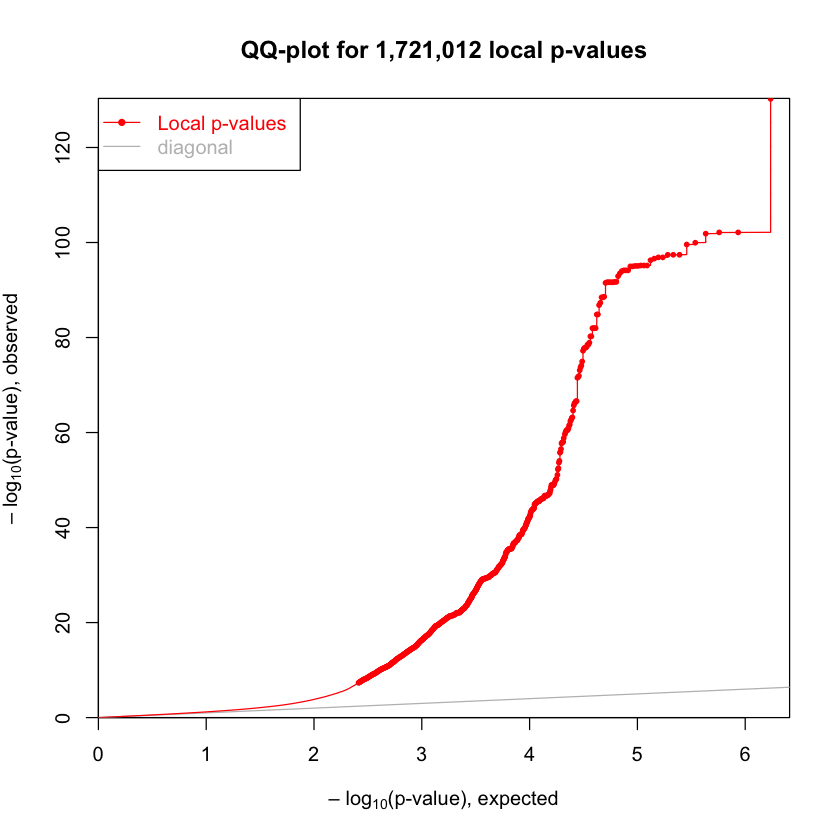

In [43]:
plot(me)

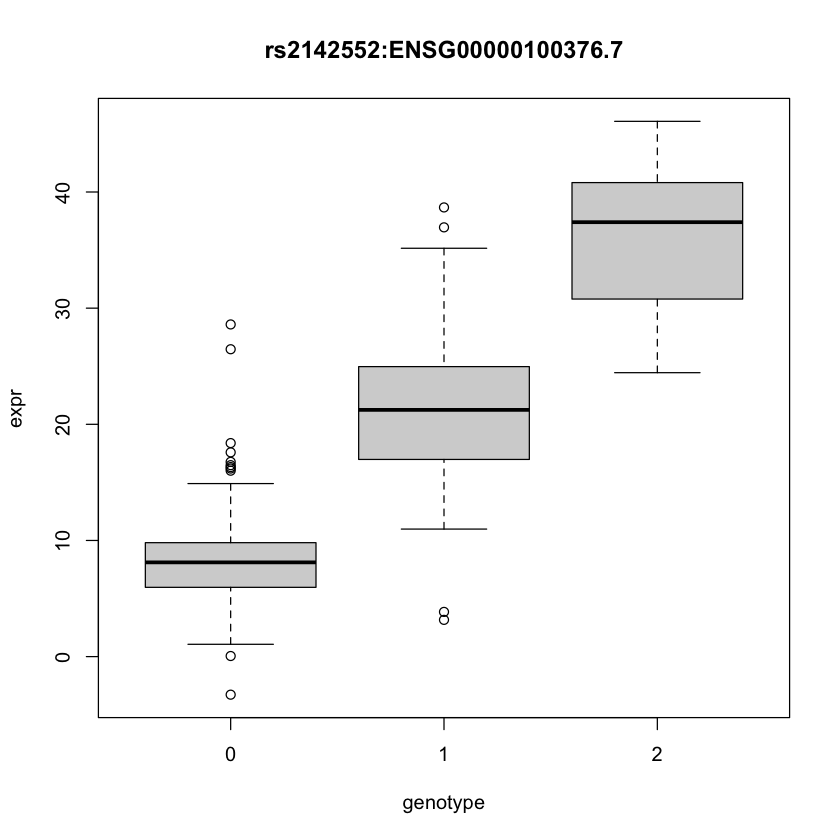

In [62]:
boxplot(expr ~ genotype, data = plot.df, main = 'rs2142552:ENSG00000100376.7')

In [65]:
population.data <- read.table('ALL_1000G_phase1integrated_v3.sample', header = TRUE)
head(population.data)

,sample,population,group,sex
,<chr>,<chr>,<chr>,<int>
1,HG00096,GBR,EUR,1
2,HG00097,GBR,EUR,2
3,HG00099,GBR,EUR,2
4,HG00100,GBR,EUR,2
5,HG00101,GBR,EUR,1
6,HG00102,GBR,EUR,2


In [82]:
unique(population.data$population)

[1] "GBR" "FIN" "CHS" "PUR" "CLM" "IBS" "CEU" "YRI" "CHB" "JPT" "LWK" "ASW"
[13] "MXL" "TSI"

In [95]:
ceu.samples <- population.data[population.data$population == 'CEU', ]
ceu.samples <- ceu.samples$sample

ceu.snp.data <- snp.data[, colnames(snp.data) %in% ceu.samples]
ceu.rnaseq.data <- rnaseq.data[, colnames(rnaseq.data) %in% ceu.samples]

# save output to file
write.table(ceu.rnaseq.data, './matrix_eqtl_phenotype_ceu.txt')
write.table(ceu.snp.data, './matrix_eqtl_genotype_data_ceu.txt')

In [100]:
useModel = modelLINEAR
SNP_file_name = './matrix_eqtl_genotype_data_ceu.txt'
expression_file_name = './matrix_eqtl_phenotype_ceu.txt'
covariates_file_name = character()
output_file_name = tempfile()

errorCovariance = numeric()

snps = SlicedData$new()
snps$fileDelimiter = " "
snps$fileOmitCharacters = "NA"
snps$fileSkipRows = 1
snps$fileSkipColumns = 1
snps$fileSliceSize = 2000
snps$LoadFile(SNP_file_name)

gene = SlicedData$new()
gene$fileDelimiter = " "
gene$fileOmitCharacters = "NA"
gene$fileSkipRows = 1
gene$fileSkipColumns = 1
gene$fileSliceSize = 2000
gene$LoadFile(expression_file_name)

me_ceu = Matrix_eQTL_main(
    snps = snps,
    gene = gene,
    genepos = genes,
    snpspos = snp.df,
    cisDist = 500000,
    pvOutputThreshold.cis = 5e-8,
    pvOutputThreshold = 0,
#     cvrt = cvrt,
    output_file_name = output_file_name,
    useModel = useModel,
    errorCovariance = errorCovariance,
    verbose = TRUE,
    pvalue.hist = 'qqplot',
    min.pv.by.genesnp = FALSE,
    noFDRsaveMemory = FALSE
)

Rows read: 2,000

Rows read: 4,000

Rows read: 6,000

Rows read: 8,000

Rows read: 10,000

Rows read: 12,000

Rows read: 14,000

Rows read: 16,000

Rows read: 18,000

Rows read: 20,000

Rows read: 22,000

Rows read: 24,000

Rows read: 26,000

Rows read: 28,000

Rows read: 30,000

Rows read: 32,000

Rows read: 34,000

Rows read: 36,000

Rows read: 38,000

Rows read: 40,000

Rows read: 42,000

Rows read: 44,000

Rows read: 46,000

Rows read: 48,000

Rows read: 50,000

Rows read: 52,000

Rows read: 54,000

Rows read: 56,000

Rows read: 58,000

Rows read: 60,000

Rows read: 62,000

Rows read: 64,000

Rows read: 66,000

Rows read: 68,000

Rows read: 70,000

Rows read: 72,000

Rows read: 74,000

Rows read: 76,000

Rows read: 78,000

Rows read: 80,000

Rows read: 82,000

Rows read: 84,000

Rows read: 86,000

Rows read: 88,000

Rows read: 90,000

Rows read: 92,000

Rows read: 94,000

Rows read: 96,000

Rows read: 98,000

Rows read: 100,000

Rows read: 101227 done.

Rows read: 2,000

Rows read:

In [96]:
fin.samples <- population.data[population.data$population == 'FIN', ]
fin.samples <- fin.samples$sample

fin.snp.data <- snp.data[, colnames(snp.data) %in% fin.samples]
fin.rnaseq.data <- rnaseq.data[, colnames(rnaseq.data) %in% fin.samples]

# save output to file
write.table(fin.rnaseq.data, './matrix_eqtl_phenotype_fin.txt')
write.table(fin.snp.data, './matrix_eqtl_genotype_data_fin.txt')

In [106]:
useModel = modelLINEAR
SNP_file_name = './matrix_eqtl_genotype_data_fin.txt'
expression_file_name = './matrix_eqtl_phenotype_fin.txt'
covariates_file_name = character()
output_file_name = tempfile()

errorCovariance = numeric()

snps = SlicedData$new()
snps$fileDelimiter = " "
snps$fileOmitCharacters = "NA"
snps$fileSkipRows = 1
snps$fileSkipColumns = 1
snps$fileSliceSize = 2000
snps$LoadFile(SNP_file_name)

gene = SlicedData$new()
gene$fileDelimiter = " "
gene$fileOmitCharacters = "NA"
gene$fileSkipRows = 1
gene$fileSkipColumns = 1
gene$fileSliceSize = 2000
gene$LoadFile(expression_file_name)

me_fin = Matrix_eQTL_main(
    snps = snps,
    gene = gene,
    genepos = genes,
    snpspos = snp.df,
    cisDist = 500000,
    pvOutputThreshold.cis = 5e-8,
    pvOutputThreshold = 0,
#     cvrt = cvrt,
    output_file_name = output_file_name,
    useModel = useModel,
    errorCovariance = errorCovariance,
    verbose = TRUE,
    pvalue.hist = 'qqplot',
    min.pv.by.genesnp = FALSE,
    noFDRsaveMemory = FALSE
)

Rows read: 2,000

Rows read: 4,000

Rows read: 6,000

Rows read: 8,000

Rows read: 10,000

Rows read: 12,000

Rows read: 14,000

Rows read: 16,000

Rows read: 18,000

Rows read: 20,000

Rows read: 22,000

Rows read: 24,000

Rows read: 26,000

Rows read: 28,000

Rows read: 30,000

Rows read: 32,000

Rows read: 34,000

Rows read: 36,000

Rows read: 38,000

Rows read: 40,000

Rows read: 42,000

Rows read: 44,000

Rows read: 46,000

Rows read: 48,000

Rows read: 50,000

Rows read: 52,000

Rows read: 54,000

Rows read: 56,000

Rows read: 58,000

Rows read: 60,000

Rows read: 62,000

Rows read: 64,000

Rows read: 66,000

Rows read: 68,000

Rows read: 70,000

Rows read: 72,000

Rows read: 74,000

Rows read: 76,000

Rows read: 78,000

Rows read: 80,000

Rows read: 82,000

Rows read: 84,000

Rows read: 86,000

Rows read: 88,000

Rows read: 90,000

Rows read: 92,000

Rows read: 94,000

Rows read: 96,000

Rows read: 98,000

Rows read: 100,000

Rows read: 101227 done.

Rows read: 2,000

Rows read:

In [97]:
gbr.samples <- population.data[population.data$population == 'GBR', ]
gbr.samples <- gbr.samples$sample

gbr.snp.data <- snp.data[, colnames(snp.data) %in% gbr.samples]
gbr.rnaseq.data <- rnaseq.data[, colnames(rnaseq.data) %in% gbr.samples]

# save output to file
write.table(gbr.rnaseq.data, './matrix_eqtl_phenotype_gbr.txt')
write.table(gbr.snp.data, './matrix_eqtl_genotype_data_gbr.txt')

In [107]:
useModel = modelLINEAR
SNP_file_name = './matrix_eqtl_genotype_data_gbr.txt'
expression_file_name = './matrix_eqtl_phenotype_gbr.txt'
covariates_file_name = character()
output_file_name = tempfile()

errorCovariance = numeric()

snps = SlicedData$new()
snps$fileDelimiter = " "
snps$fileOmitCharacters = "NA"
snps$fileSkipRows = 1
snps$fileSkipColumns = 1
snps$fileSliceSize = 2000
snps$LoadFile(SNP_file_name)

gene = SlicedData$new()
gene$fileDelimiter = " "
gene$fileOmitCharacters = "NA"
gene$fileSkipRows = 1
gene$fileSkipColumns = 1
gene$fileSliceSize = 2000
gene$LoadFile(expression_file_name)

me_gbr = Matrix_eQTL_main(
    snps = snps,
    gene = gene,
    genepos = genes,
    snpspos = snp.df,
    cisDist = 500000,
    pvOutputThreshold.cis = 5e-8,
    pvOutputThreshold = 0,
#     cvrt = cvrt,
    output_file_name = output_file_name,
    useModel = useModel,
    errorCovariance = errorCovariance,
    verbose = TRUE,
    pvalue.hist = 'qqplot',
    min.pv.by.genesnp = FALSE,
    noFDRsaveMemory = FALSE
)

Rows read: 2,000

Rows read: 4,000

Rows read: 6,000

Rows read: 8,000

Rows read: 10,000

Rows read: 12,000

Rows read: 14,000

Rows read: 16,000

Rows read: 18,000

Rows read: 20,000

Rows read: 22,000

Rows read: 24,000

Rows read: 26,000

Rows read: 28,000

Rows read: 30,000

Rows read: 32,000

Rows read: 34,000

Rows read: 36,000

Rows read: 38,000

Rows read: 40,000

Rows read: 42,000

Rows read: 44,000

Rows read: 46,000

Rows read: 48,000

Rows read: 50,000

Rows read: 52,000

Rows read: 54,000

Rows read: 56,000

Rows read: 58,000

Rows read: 60,000

Rows read: 62,000

Rows read: 64,000

Rows read: 66,000

Rows read: 68,000

Rows read: 70,000

Rows read: 72,000

Rows read: 74,000

Rows read: 76,000

Rows read: 78,000

Rows read: 80,000

Rows read: 82,000

Rows read: 84,000

Rows read: 86,000

Rows read: 88,000

Rows read: 90,000

Rows read: 92,000

Rows read: 94,000

Rows read: 96,000

Rows read: 98,000

Rows read: 100,000

Rows read: 101227 done.

Rows read: 2,000

Rows read:

In [98]:
tsi.samples <- population.data[population.data$population == 'TSI', ]
tsi.samples <- tsi.samples$sample

tsi.snp.data <- snp.data[, colnames(snp.data) %in% tsi.samples]
tsi.rnaseq.data <- rnaseq.data[, colnames(rnaseq.data) %in% tsi.samples]

# save output to file
write.table(tsi.rnaseq.data, './matrix_eqtl_phenotype_tsi.txt')
write.table(tsi.snp.data, './matrix_eqtl_genotype_data_tsi.txt')

In [108]:
useModel = modelLINEAR
SNP_file_name = './matrix_eqtl_genotype_data_tsi.txt'
expression_file_name = './matrix_eqtl_phenotype_tsi.txt'
covariates_file_name = character()
output_file_name = tempfile()

errorCovariance = numeric()

snps = SlicedData$new()
snps$fileDelimiter = " "
snps$fileOmitCharacters = "NA"
snps$fileSkipRows = 1
snps$fileSkipColumns = 1
snps$fileSliceSize = 2000
snps$LoadFile(SNP_file_name)

gene = SlicedData$new()
gene$fileDelimiter = " "
gene$fileOmitCharacters = "NA"
gene$fileSkipRows = 1
gene$fileSkipColumns = 1
gene$fileSliceSize = 2000
gene$LoadFile(expression_file_name)

me_tsi = Matrix_eQTL_main(
    snps = snps,
    gene = gene,
    genepos = genes,
    snpspos = snp.df,
    cisDist = 500000,
    pvOutputThreshold.cis = 5e-8,
    pvOutputThreshold = 0,
#     cvrt = cvrt,
    output_file_name = output_file_name,
    useModel = useModel,
    errorCovariance = errorCovariance,
    verbose = TRUE,
    pvalue.hist = 'qqplot',
    min.pv.by.genesnp = FALSE,
    noFDRsaveMemory = FALSE
)

Rows read: 2,000

Rows read: 4,000

Rows read: 6,000

Rows read: 8,000

Rows read: 10,000

Rows read: 12,000

Rows read: 14,000

Rows read: 16,000

Rows read: 18,000

Rows read: 20,000

Rows read: 22,000

Rows read: 24,000

Rows read: 26,000

Rows read: 28,000

Rows read: 30,000

Rows read: 32,000

Rows read: 34,000

Rows read: 36,000

Rows read: 38,000

Rows read: 40,000

Rows read: 42,000

Rows read: 44,000

Rows read: 46,000

Rows read: 48,000

Rows read: 50,000

Rows read: 52,000

Rows read: 54,000

Rows read: 56,000

Rows read: 58,000

Rows read: 60,000

Rows read: 62,000

Rows read: 64,000

Rows read: 66,000

Rows read: 68,000

Rows read: 70,000

Rows read: 72,000

Rows read: 74,000

Rows read: 76,000

Rows read: 78,000

Rows read: 80,000

Rows read: 82,000

Rows read: 84,000

Rows read: 86,000

Rows read: 88,000

Rows read: 90,000

Rows read: 92,000

Rows read: 94,000

Rows read: 96,000

Rows read: 98,000

Rows read: 100,000

Rows read: 101227 done.

Rows read: 2,000

Rows read:

In [99]:
yri.samples <- population.data[population.data$population == 'YRI', ]
yri.samples <- yri.samples$sample

yri.snp.data <- snp.data[, colnames(snp.data) %in% yri.samples]
yri.rnaseq.data <- rnaseq.data[, colnames(rnaseq.data) %in% yri.samples]

# save output to file
write.table(yri.rnaseq.data, './matrix_eqtl_phenotype_yri.txt')
write.table(yri.snp.data, './matrix_eqtl_genotype_data_yri.txt')

In [109]:
useModel = modelLINEAR
SNP_file_name = './matrix_eqtl_genotype_data_yri.txt'
expression_file_name = './matrix_eqtl_phenotype_yri.txt'
covariates_file_name = character()
output_file_name = tempfile()

errorCovariance = numeric()

snps = SlicedData$new()
snps$fileDelimiter = " "
snps$fileOmitCharacters = "NA"
snps$fileSkipRows = 1
snps$fileSkipColumns = 1
snps$fileSliceSize = 2000
snps$LoadFile(SNP_file_name)

gene = SlicedData$new()
gene$fileDelimiter = " "
gene$fileOmitCharacters = "NA"
gene$fileSkipRows = 1
gene$fileSkipColumns = 1
gene$fileSliceSize = 2000
gene$LoadFile(expression_file_name)

me_yri = Matrix_eQTL_main(
    snps = snps,
    gene = gene,
    genepos = genes,
    snpspos = snp.df,
    cisDist = 500000,
    pvOutputThreshold.cis = 5e-8,
    pvOutputThreshold = 0,
#     cvrt = cvrt,
    output_file_name = output_file_name,
    useModel = useModel,
    errorCovariance = errorCovariance,
    verbose = TRUE,
    pvalue.hist = 'qqplot',
    min.pv.by.genesnp = FALSE,
    noFDRsaveMemory = FALSE
)

Rows read: 2,000

Rows read: 4,000

Rows read: 6,000

Rows read: 8,000

Rows read: 10,000

Rows read: 12,000

Rows read: 14,000

Rows read: 16,000

Rows read: 18,000

Rows read: 20,000

Rows read: 22,000

Rows read: 24,000

Rows read: 26,000

Rows read: 28,000

Rows read: 30,000

Rows read: 32,000

Rows read: 34,000

Rows read: 36,000

Rows read: 38,000

Rows read: 40,000

Rows read: 42,000

Rows read: 44,000

Rows read: 46,000

Rows read: 48,000

Rows read: 50,000

Rows read: 52,000

Rows read: 54,000

Rows read: 56,000

Rows read: 58,000

Rows read: 60,000

Rows read: 62,000

Rows read: 64,000

Rows read: 66,000

Rows read: 68,000

Rows read: 70,000

Rows read: 72,000

Rows read: 74,000

Rows read: 76,000

Rows read: 78,000

Rows read: 80,000

Rows read: 82,000

Rows read: 84,000

Rows read: 86,000

Rows read: 88,000

Rows read: 90,000

Rows read: 92,000

Rows read: 94,000

Rows read: 96,000

Rows read: 98,000

Rows read: 100,000

Rows read: 101227 done.

Rows read: 2,000

Rows read:

In [133]:
populations <- c('CEU', 'FIN', 'GBR', 'TSI', 'YRI')
eqtl.counts <- c(me_ceu$cis$neqtls, me_fin$cis$neqtls, me_gbr$cis$neqtls, me_tsi$cis$neqtls, me_yri$cis$neqtls)
plot.df <- data.frame(cbind(populations, as.integer(eqtl.counts)))
plot.df$V2 <- as.integer(plot.df$V2)
colnames(plot.df) <- c('population', 'eQTL_count')
head(plot.df)

,population,eQTL_count
,<chr>,<int>
1,CEU,590
2,FIN,917
3,GBR,1329
4,TSI,1156
5,YRI,590


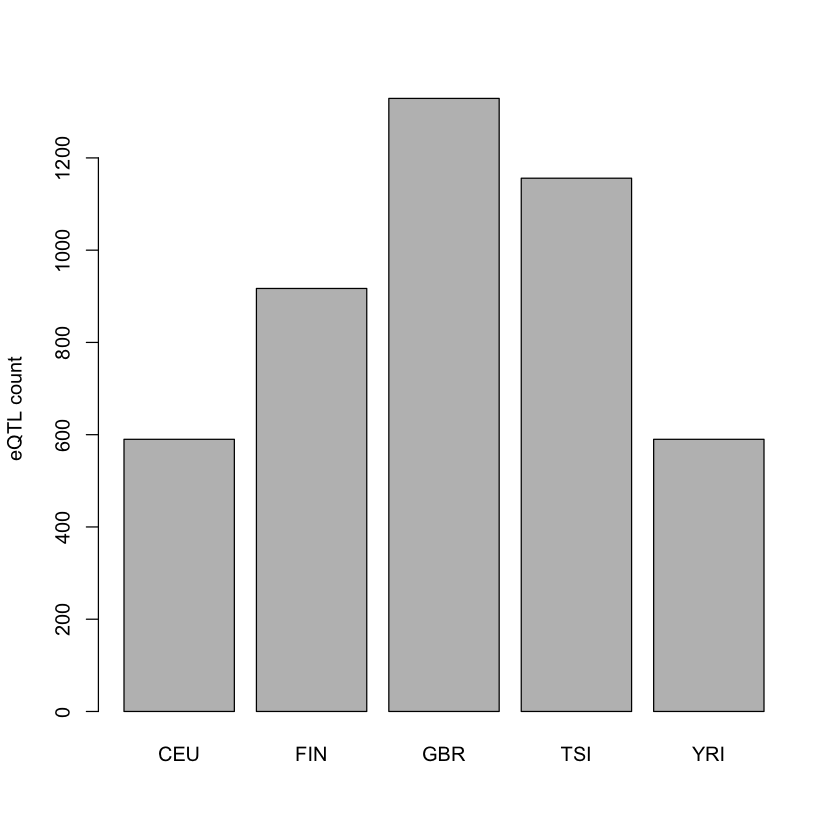

In [134]:
barplot(plot.df$eQTL_count, names.arg = plot.df$population, ylab = 'eQTL count')

In [122]:
?barplot

In [135]:
populations <- c('CEU', 'FIN', 'GBR', 'TSI', 'YRI')
individual.counts <- c(ncol(ceu.snp.data), ncol(fin.snp.data), ncol(gbr.snp.data), ncol(tsi.snp.data), ncol(yri.snp.data))
plot.df <- data.frame(cbind(populations, as.integer(individual.counts)))
plot.df$V2 <- as.integer(plot.df$V2)
colnames(plot.df) <- c('population', 'individual_count')
head(plot.df)

,population,individual_count
,<chr>,<int>
1,CEU,78
2,FIN,89
3,GBR,85
4,TSI,92
5,YRI,77


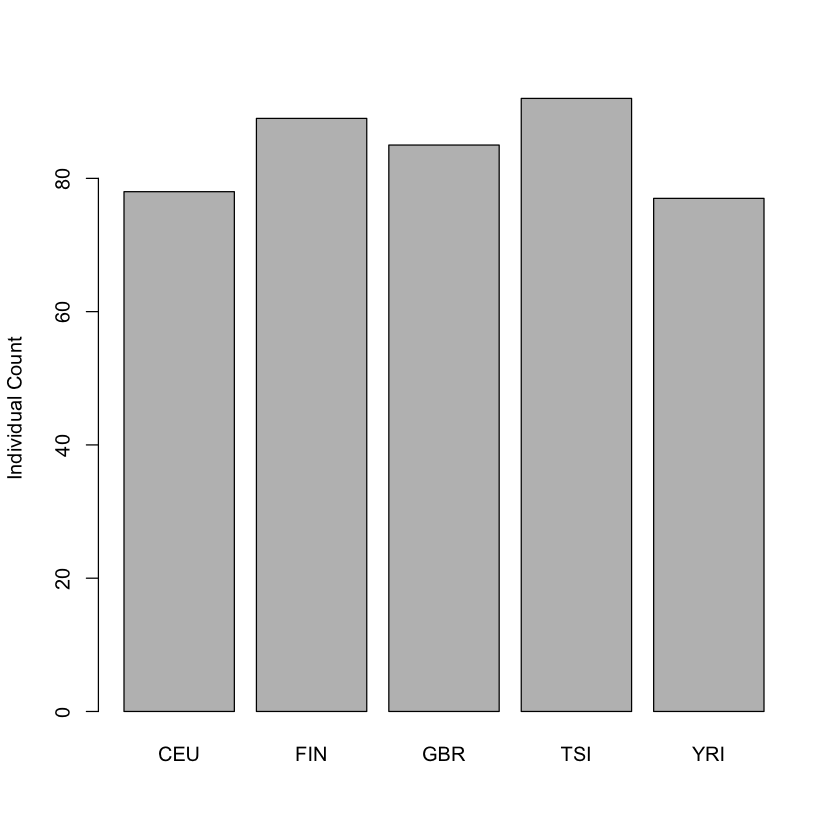

In [136]:
barplot(plot.df$individual_count, names.arg = plot.df$population, ylab = 'Individual Count')

In [138]:
ceu.eqtls <- me_ceu$cis$eqtls
fin.eqtls <- me_fin$cis$eqtls
gbr.eqtls <- me_gbr$cis$eqtls
tsi.eqtls <- me_tsi$cis$eqtls
yri.eqtls <- me_yri$cis$eqtls

In [141]:
ceu.eqtls$snp.gene <- paste(ceu.eqtls$snps, ceu.eqtls$gene)
fin.eqtls$snp.gene <- paste(fin.eqtls$snps, fin.eqtls$gene)
gbr.eqtls$snp.gene <- paste(gbr.eqtls$snps, gbr.eqtls$gene)
tsi.eqtls$snp.gene <- paste(tsi.eqtls$snps, tsi.eqtls$gene)
yri.eqtls$snp.gene <- paste(yri.eqtls$snps, yri.eqtls$gene)

In [142]:
head(ceu.eqtls)

,snps,gene,statistic,pvalue,FDR,beta,snp.gene
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,rs4821846,ENSG00000197549.5,25.91164,3.659366e-39,6.297813e-33,7.628579,rs4821846 ENSG00000197549.5
2,rs5751361,ENSG00000202058.1,23.62775,1.757048e-36,1.511950e-30,11.719890,rs5751361 ENSG00000202058.1
3,rs2020408,ENSG00000211670.2,20.42407,2.286907e-32,1.311931e-26,195.820716,rs2020408 ENSG00000211670.2
4,esv2669470,ENSG00000184674.7,-19.83442,1.466557e-31,6.309907e-26,-9.105680,esv2669470 ENSG00000184674.7
5,rs17581268,ENSG00000211655.2,19.70527,2.214494e-31,7.622342e-26,471.665434,rs17581268 ENSG00000211655.2
6,rs5757989,ENSG00000211640.2,17.78343,1.275254e-28,2.194727e-23,2405.878287,rs5757989 ENSG00000211640.2


In [143]:
nrow(ceu.eqtls)

[1] 590

In [146]:
ceu.unique.eqtls <- ceu.eqtls[!(ceu.eqtls$snp.gene %in% c(fin.eqtls$snp.gene, gbr.eqtls$snp.gene, tsi.eqtls$snp.gene, yri.eqtls$snp.gene)), ]
nrow(ceu.unique.eqtls)

[1] 0

In [151]:
fin.unique.eqtls <- fin.eqtls[!(fin.eqtls$snp.gene %in% c(ceu.eqtls$snp.gene, gbr.eqtls$snp.gene, tsi.eqtls$snp.gene, yri.eqtls$snp.gene)), ]
nrow(fin.unique.eqtls)

[1] 294

In [152]:
gbr.unique.eqtls <- gbr.eqtls[!(gbr.eqtls$snp.gene %in% c(ceu.eqtls$snp.gene, fin.eqtls$snp.gene, tsi.eqtls$snp.gene, yri.eqtls$snp.gene)), ]
nrow(gbr.unique.eqtls)

[1] 490

In [153]:
tsi.unique.eqtls <- tsi.eqtls[!(tsi.eqtls$snp.gene %in% c(ceu.eqtls$snp.gene, fin.eqtls$snp.gene, gbr.eqtls$snp.gene, yri.eqtls$snp.gene)), ]
nrow(tsi.unique.eqtls)

[1] 364

In [154]:
yri.unique.eqtls <- yri.eqtls[!(yri.eqtls$snp.gene %in% c(ceu.eqtls$snp.gene, fin.eqtls$snp.gene, gbr.eqtls$snp.gene, tsi.eqtls$snp.gene)), ]
nrow(yri.unique.eqtls)

[1] 0

In [158]:
head(fin.unique.eqtls)

,snps,gene,statistic,pvalue,FDR,beta,snp.gene
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,rs6003218,ENSG00000211649.2,48.51864,8.87297e-65,2.545081e-59,1916.717,rs6003218 ENSG00000211649.2
2,rs8136263,ENSG00000211649.2,48.51864,8.87297e-65,2.545081e-59,1916.717,rs8136263 ENSG00000211649.2
3,rs16990584,ENSG00000211649.2,48.51864,8.87297e-65,2.545081e-59,1916.717,rs16990584 ENSG00000211649.2
4,rs75650255,ENSG00000211649.2,48.51864,8.87297e-65,2.545081e-59,1916.717,rs75650255 ENSG00000211649.2
5,rs72495409,ENSG00000211649.2,48.51864,8.87297e-65,2.545081e-59,1916.717,rs72495409 ENSG00000211649.2
6,rs10483113,ENSG00000211649.2,48.51864,8.87297e-65,2.545081e-59,1916.717,rs10483113 ENSG00000211649.2


In [165]:
fin.snp.genes <- fin.unique.eqtls %>% count(gene) %>% count(n)
fin.snp.genes$population <- 'FIN'
gbr.snp.genes <- gbr.unique.eqtls %>% count(gene) %>% count(n)
gbr.snp.genes$population <- 'GBR'
tsi.snp.genes <- tsi.unique.eqtls %>% count(gene) %>% count(n)
tsi.snp.genes$population <- 'TSI'
plot.df <- data.frame(rbind(fin.snp.genes, gbr.snp.genes, tsi.snp.genes))
colnames(plot.df) <- c('n_snps', 'n_genes', 'population')
head(plot.df)

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.
Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.


,n_snps,n_genes,population
,<int>,<int>,<chr>
1,1,26,FIN
2,2,7,FIN
3,3,3,FIN
4,5,1,FIN
5,6,1,FIN
6,7,2,FIN


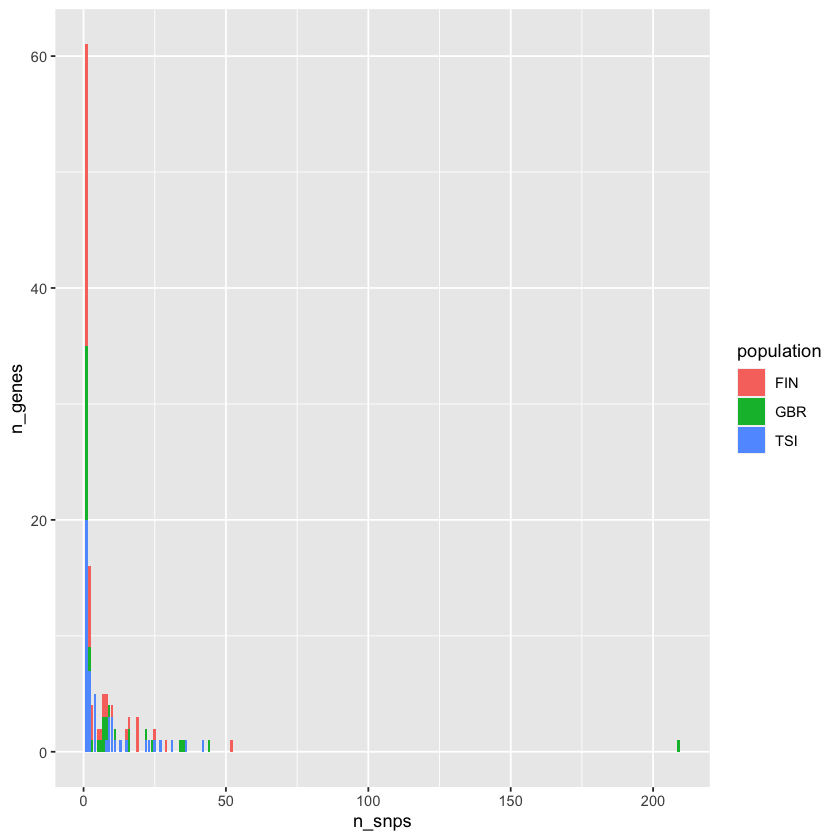

In [173]:
ggplot(plot.df, aes(fill=population, y=n_genes, x=n_snps)) + 
       geom_bar(position="stack", stat="identity")

Warning message:
“Removed 16 rows containing missing values (`position_stack()`).”


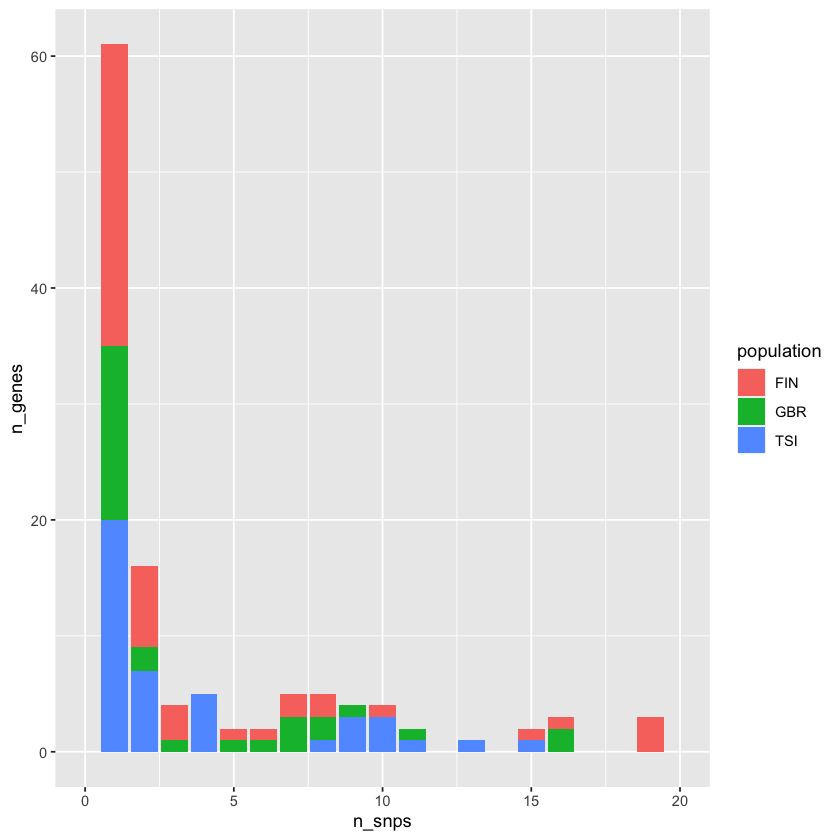

In [174]:
ggplot(plot.df, aes(fill=population, y=n_genes, x=n_snps)) + 
       geom_bar(position="stack", stat="identity") + xlim(0, 20)